# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
ValueNumeric = fifa["Value"].replace({'\€':''}, regex = True)
print (ValueNumeric)


0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Value, Length: 18207, dtype: object


In [5]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000
   

ValueNumeric = ValueNumeric.apply(value_to_float)
ValueNumeric


0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [6]:
valueNumeric = pd.DataFrame(ValueNumeric)
fifa['valueNumeric'] = valueNumeric
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,valueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [42]:
# Your code here:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('fifa["valueNumeric"] ~C(fifa["Position"])*C(fifa["Preferred Foot"])', data=fifa).fit()
model_anova = sm.stats.anova_lm(model, typ=2)
model_anova



,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",1.659610e+16,26.0,20.860790,2.309558e-96
"C(fifa[""Preferred Foot""])",2.316461e+14,1.0,7.570476,5.939195e-03
"C(fifa[""Position""]):C(fifa[""Preferred Foot""])",5.182140e+15,26.0,6.513793,7.422724e-23
Residual,5.462771e+17,17853.0,NaN,NaN


What is your conclusion from this ANOVA?

In [45]:
# Your conclusions here:
#Cuanto mas alto las F mas relacionadas etan las variables entre si.

checkPValue = lambda model_anova['f'],threshold=0.05: "--> Null(H0) hypotesis rejected" if model_anova['f'] < threshold else "--> We cannot reject the null



SyntaxError: invalid syntax (<ipython-input-45-2f6fd369b409>, line 4)

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
# Your code here:

nation = smf.ols('fifa["valueNumeric"] ~C(fifa["Nationality"])', data=fifa).fit()
sm.stats.anova_lm(nation, typ=2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",3.303532e+16,163.0,6.732612,2.370904e-132
Residual,5.355897e+17,17792.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [17]:

fifa = fifa.dropna(axis=0, how="any")


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.


In [41]:
# Your code here:
# First the constant

X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])

Y = fifa["valueNumeric"]

model = sm.OLS(Y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           valueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          2.64e-192
Time:                        17:39:51   Log-Likelihood:            -3.0332e+05
No. Observations:               17907   AIC:                         6.066e+05
Df Residuals:                   17904   BIC:                         6.067e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.072e+06   1.97e+05    -15.576      0.000   -3.46e+06   -2.69e+06
Stamina      6.039e+04   3291.696     18.346      0.000    5.39e+04    6.68e+04
SprintSpeed  2.633e+04   3569.288      7.376      0.000    1.93e+04    3.33e+04
==============================================================================
Omnibus:                    22822.402   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4639541.011
Skew:                           7.039   Prob(JB):                         0.00
Kurtosis:                      80.588   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [31]:
# Your code here:

X = sm.add_constant(fifa[['Potential']])

Y = fifa["valueNumeric"]

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           valueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:16:52   Log-Likelihood:            -3.0009e+05
No. Observations:               17907   AIC:                         6.002e+05
Df Residuals:                   17905   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.552e+07      4e+05    -88.778      0.000   -3.63e+07   -3.47e+07
Potential   5.323e+05   5588.269     95.252      0.000    5.21e+05    5.43e+05
==============================================================================
Omnibus:                    23011.631   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6334620.314
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                      94.068   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

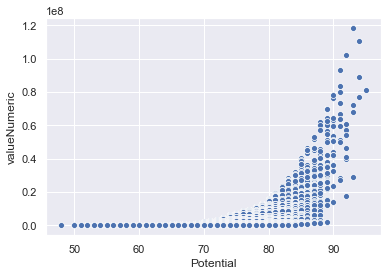

In [39]:
# Your code here:
import seaborn as sns


sns.scatterplot(x ="Potential", y = "valueNumeric", data = fifa)
